# CS 135 day01: Intro to Pandas and Matplotlib for Data Analysis and Viz

A Python-based version of the "Ch 2 lab" from James et al.'s "Introduction to Statistical Learning" textbook

Inspired by this original notebook: https://nbviewer.jupyter.org/github/emredjan/ISL-python/blob/master/labs/lab_02.3_introduction.ipynb

# What to do

The first half of this notebook gives several "demos" of how to use pandas and matplotlib.

The second half of this notebook is a space for you to try out several "exercises" that would be useful when analyzing a dataset.

If you get stuck, please ask a question on Piazza or search the web for help (Stack Overflow is a great resource!)

# Outline

* [Line plots](#plot)
* [Subplots](#subplots)
* [Histograms](#distplot)
* [Loading CSV with NumPy's loadtxt](#loadtxt)
* [Loading CSV with Pandas' read_csv](#read_csv)
* [Scatter plots](#jointplot)
* [Pair plots](#pairplot)

# Exercises

* What is the *range* of horsepower values in the provided 'auto' dataset?
* Can you plot the relationship between horsepower and miles per gallon (mpg)?
* Within the loaded data frame, can you replace all missing values with the *population mean*?

# Takeaways

* Pandas DataFrames are convienent for manipulating real datasets
* * Makes reading from CSV files whose columns have multiple types a breeze
* * Handles missing values a bit easier than just using raw NumPy functions

* Matplotlib and seaborn offer some nice plot styles
* * But take getting used to! Practice early and often!

In [ ]:
import numpy as np
import os

# Import pandas (data management library)
import pandas as pd

In [ ]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8') # pretty matplotlib plots
sns.set('notebook', style='whitegrid', font_scale=1.25)

# Ensure required data is available

In [ ]:
reqd_data_rel_path = 'dataset_auto.csv'

# If running in cloud on Google colab, be sure to acquire the required dataset
if os.getenv("COLAB_RELEASE_TAG") and not os.path.exists(reqd_data_rel_path):
    !git clone https://github.com/tufts-ml-courses/cs135-23f-assignments.git
    os.chdir(os.path.join('cs135-23f-assignments', 'labs'))
    
if not os.path.exists(reqd_data_rel_path):
    raise ValueError("Need to run this script within 'labs' dir of a valid checkout of the cs135 repo")

<a id="plot"></a>

# Line plot

First argument: iterable to display along x-axis

Second arg:     iterable to display along y-axis

'ks-' : 'k' means use color black, 's' means use square markers, '-' means solid line style


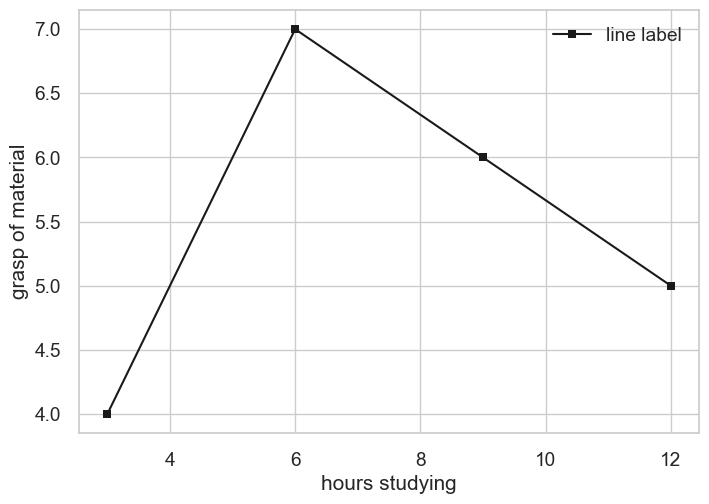

In [ ]:
plt.plot([3, 6, 9, 12], [4, 7, 6, 5], 'ks-');
plt.xlabel('hours studying');
plt.ylabel('grasp of material');
plt.legend(['line label']);

<a id="subplots"></a>

# Subplots

Subplots allows us to show multiple line plots side-by-side

Each subplot has its own "axis", which is represented as a object via Matplotlib.
We can interact with that object via methods like 'plot' or 'set_title' to set its properties.

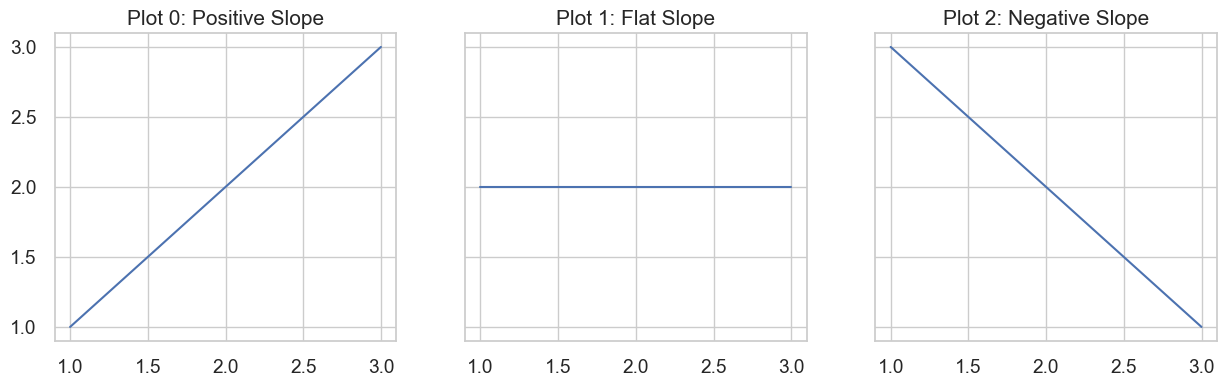

In [ ]:
# Create multiple subplots in same figure
# We recommend using 'sharey=True' so y limits in all plots are the same. Makes comparing across plots easier!

fig_handle, axis_handles = plt.subplots(
    nrows=1, ncols=3, figsize=(15, 4),
    sharey=True, sharex=True);

ax0 = axis_handles[0]
ax0.plot([1, 2, 3], [1, 2, 3]);
ax0.set_title('Plot 0: Positive Slope');

ax1 = axis_handles[1]
ax1.plot([1, 2, 3], [2, 2, 2]);
ax1.set_title('Plot 1: Flat Slope');

ax2 = axis_handles[2]
ax2.plot([1, 2, 3], [3, 2, 1]);
ax2.set_title('Plot 2: Negative Slope');


<a id="distplot"></a>

# Histogram of an array

Examine the empirical distribution of a sample of N examples

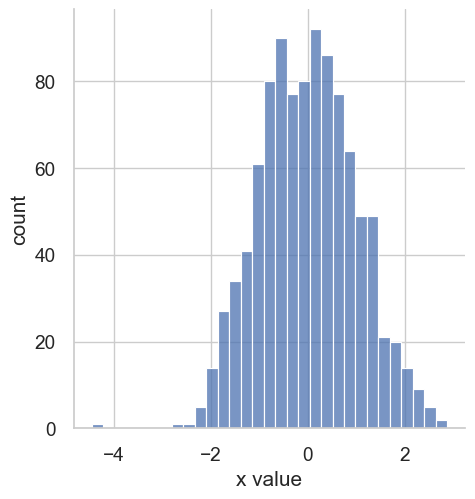

In [ ]:
N = 1000
x_N = np.random.normal(size=N) # 1000 draws from a "standard" Normal distribution
p = sns.displot(x_N, bins=31, kde=False);
plt.xlabel('x value');
plt.ylabel('count');

# Joint plot of two arrays

Make a scatterplot of points defined by two arrays.

This plot is a great way to see if there is any *relationship* between two sets of observed measurements.

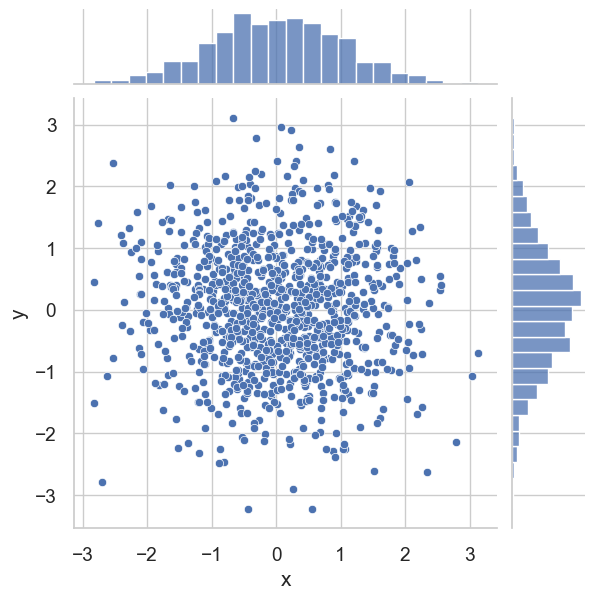

In [ ]:
N = 1000
x_N = np.random.normal(size=N)
y_N = np.random.normal(size=N)

# seaborn scatterplot
p = sns.jointplot(x=x_N, y=y_N, kind='scatter')
p.set_axis_labels(xlabel='x', ylabel='y');

<a id="loadtxt"></a>

# Loading dataset from CSV file with `np.loadtxt`

In [ ]:
# Show the first few lines of the file!

with open('dataset_auto.csv', 'r') as f:
    for line in f.readlines()[:5]:
        print(line.strip())

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11,70,1,plymouth satellite
16,8,304,150,3433,12,70,1,amc rebel sst


So we have 9 total columns of data. The first 8 are all *numeric*. The last one is *text*.

In [ ]:
# Load the file into numpy with `loadtxt`
# How is it represented??

auto_arr = np.loadtxt('dataset_auto.csv', delimiter=',', skiprows=1, dtype=str)

In [ ]:
print("shape: " + str(auto_arr.shape))
print("dtype: " + str(auto_arr.dtype))

shape: (397, 9)
dtype: <U36


FYI, if you ever see numpy give a dtype of '<U...", its probably a text string of some kind.

So, our data is currently in memory as ALL strings. That's not good. We want the numbers!


In [ ]:
# Trying to make a numerical array out of this data will fail!
try:
    auto_num_arr = np.asarray(auto_arr, dtype=np.float64)
except Exception as e:
    print(str(type(e)) + ': ' + str(e))

<class 'ValueError'>: could not convert string to float: 'chevrolet chevelle malibu'


Obviously, the last column is all strings, so we can't make this into numbers.

What if we *ignore* the last column?

In [ ]:
# Even ignoring the last column will fail!
try:
    auto_num_arr = np.asarray(auto_arr[:,:-1], dtype=np.float64)
except Exception as e:
    print(str(type(e)) + ': ' + str(e))

<class 'ValueError'>: could not convert string to float: '?'


Tricky part: This CSV file was saved using '?' symbol to denote missing values

We need to replace missing value '?' strings with np.nan (numpy's built-in missing value type)

In [ ]:
auto_num_arr = auto_arr[:,:-1].copy()                       # copy all but last column into an array
auto_num_arr[auto_num_arr == '?'] = np.nan                  # replace any entry matching '?' with a NaN value
auto_num_arr = np.asarray(auto_num_arr, dtype=np.float64)   # now convert to float64 numeric type

In [ ]:
np.mean(auto_num_arr, axis=0)

array([2.35158690e+01, 5.45843829e+00, 1.93532746e+02,            nan,
       2.97026196e+03, 1.55556675e+01, 7.59949622e+01, 1.57430730e+00])

In [ ]:
np.nanmean(auto_num_arr, axis=0) # ignore nan values when computing the mean

array([2.35158690e+01, 5.45843829e+00, 1.93532746e+02, 1.04469388e+02,
       2.97026196e+03, 1.55556675e+01, 7.59949622e+01, 1.57430730e+00])

In [ ]:
np.nanmin(auto_num_arr, axis=0)  # ignore nan values when computing the min

array([9.000e+00, 3.000e+00, 6.800e+01, 4.600e+01, 1.613e+03, 8.000e+00,
       7.000e+01, 1.000e+00])

<a id="read_csv"></a>

# Loading dataset from CSV file with `pd.read_csv`

In [ ]:
# read csv data with pandas into dataframe, explicitly setting na_values.
# pandas read_xxx functions infer datatypes, headers, dates, etc. 
# without explicit declarations or required interventions from user

auto_df = pd.read_csv('dataset_auto.csv', na_values=['?']) # '?' symbol means missing value
print(auto_df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [ ]:
auto_df.shape

(397, 9)

In [ ]:
# get column names of the dataframe
list(auto_df.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [ ]:
# show the values of one column by name
auto_df['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 397, dtype: float64

In [ ]:
# show the values of several column by name
auto_df[['mpg', 'weight']]

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
392,27.0,2790
393,44.0,2130
394,32.0,2295
395,28.0,2625


In [ ]:
# dropping rows (axis=0) where there are not-a-number (NaN) values (inplace)
auto_df.dropna(axis=0, inplace=True)
auto_df.shape

(392, 9)

<a id="jointplot"></a>

# Scatterplot using a dataframe

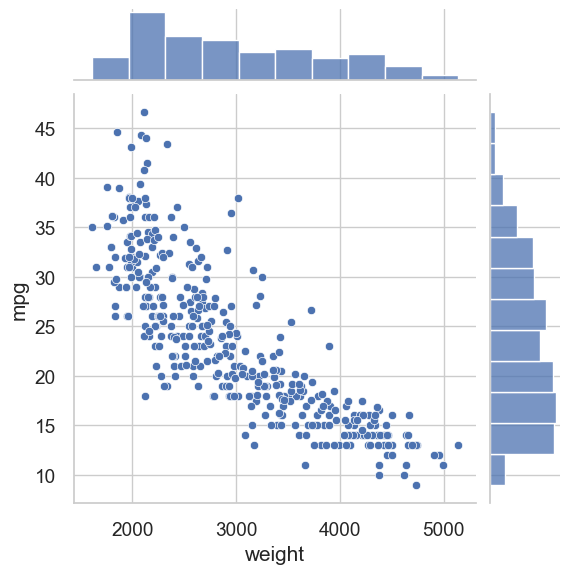

In [ ]:
# seaborn scatterplot
pl = sns.jointplot(x='weight', y='mpg', data=auto_df);

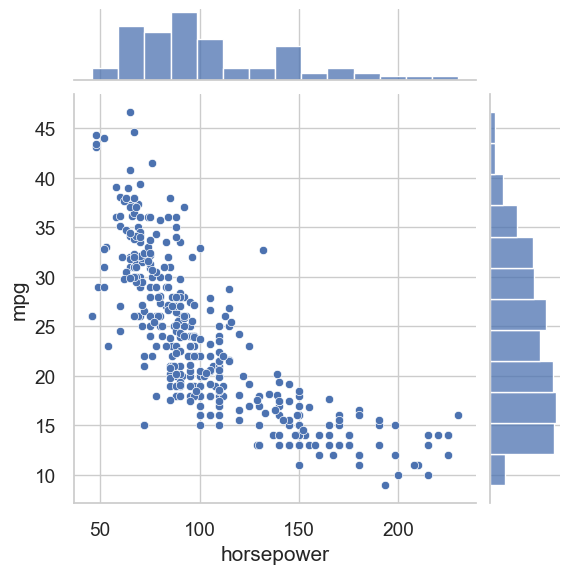

In [ ]:
# seaborn scatterplot
pl = sns.jointplot(x='horsepower', y='mpg', data=auto_df);

# Factor plots using a dataframe

In [ ]:
# changing data type of a column into category
auto_df['cylinders'] = auto_df['cylinders'].astype('category')

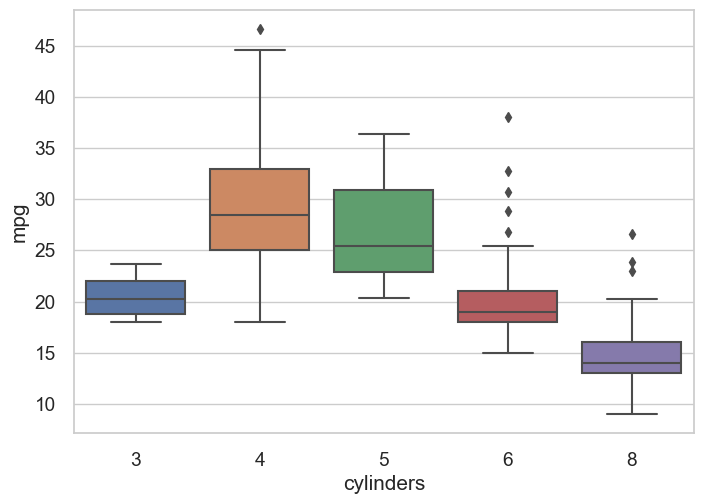

In [ ]:
# seaborn boxplot implementation
sns.boxplot(x='cylinders', y='mpg', data=auto_df);

# Histograms

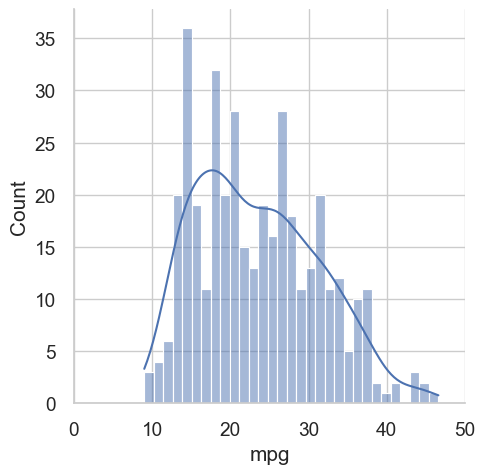

In [ ]:
# seaborn enhanced histogram with density plot
sns.displot(auto_df['mpg'], bins=31, kde=True);
plt.xlim([0, 50]);

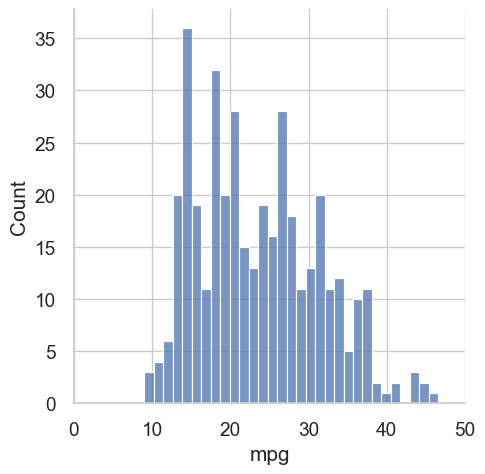

In [ ]:
# same as above, but WITHOUT the density line plot
sns.displot(auto_df['mpg'], bins=31, kde=False);
plt.xlim([0, 50]);

<a id="pairplot"></a>

# Pair plot

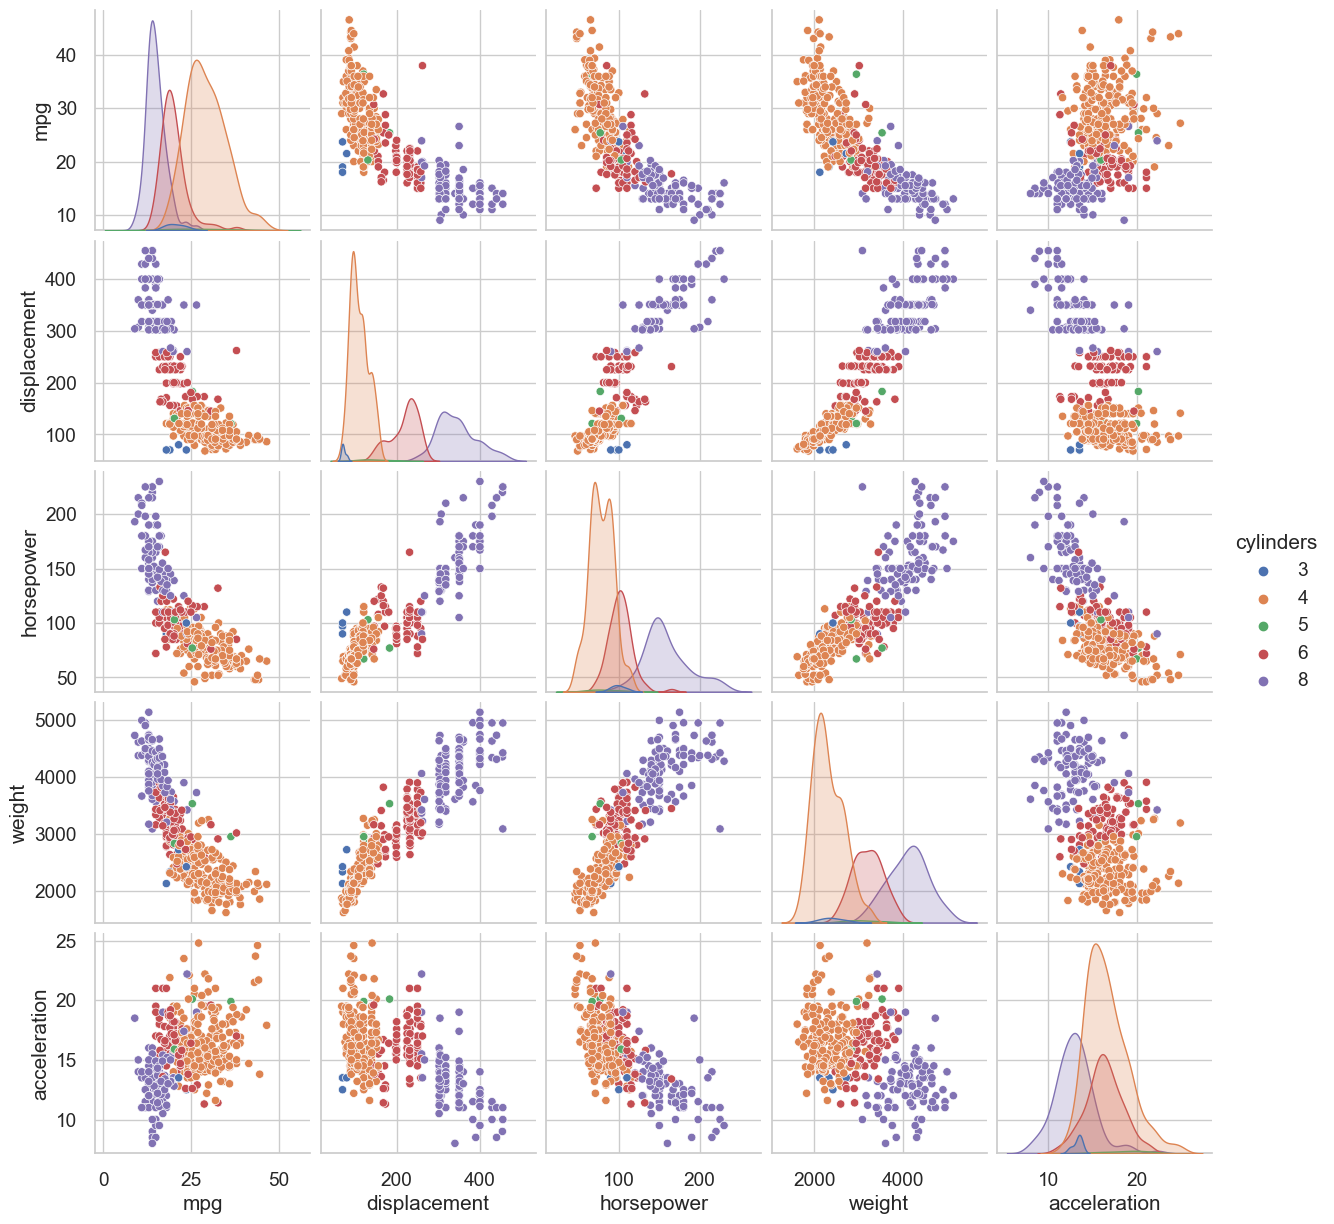

In [ ]:
# seaborn pairplot for selected variables, colored by another
sns.pairplot(auto_df, vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], hue='cylinders');

In [ ]:
# summary statistics for a single column
# wrapped as dataframe for pretty table display in jupyter
pd.DataFrame(auto_df['mpg'].describe())

,mpg
count,392.000000
mean,23.445918
std,7.805007
min,9.000000
25%,17.000000
50%,22.750000
75%,29.000000
max,46.600000



# Exercises

Try these in-class or at home!

* What is the *range* of horsepower values in the provided dataset?
* Can you plot the relationship between horsepower and miles per gallon (mpg)?
* Within the loaded data frame, can you replace all missing values with the *population mean*?